<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import math

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


# Task 8E

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
X_cv,X_test,y_cv,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=0)

In [4]:
# SVC
clf = SVC(gamma=0.001, C=100)
clf.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
def rbf_kernel(x1,x2,gamma):
  euclid_d = sum([abs(x-y)**2 for x,y in zip(x1,x2)])
  return np.exp(-1*gamma*euclid_d)

In [6]:
def decision_function(Xcv,dual_coefs,support_vec,intercept,gamma):
  n = len(support_vec)
  y_res = []
  for x in Xcv:
    res = 0
    for i in range(n):
      res += dual_coefs[i][0]*rbf_kernel(support_vec[i],x,gamma)
    y_res.append(res+intercept)
  return y_res

In [7]:
coefs = np.reshape(clf.dual_coef_,(-1,1))
intercept = clf.intercept_
svcs = clf.support_vectors_

f_cv = decision_function(X_cv,coefs,svcs,intercept,0.001)

## Compare with sklearn implementation of decision_function

In [8]:
f_cv_sklearn = clf.decision_function(X_cv)

def print_i_ele(idx):
  print("Sklearn f_cv for %d datapoint: %f" % (idx, f_cv_sklearn[idx]))
  print("Custom Implemented f_cv for %d datapoint: %f" % (idx, f_cv[idx]))
  print()


In [9]:
print_i_ele(0)
print_i_ele(845)
print_i_ele(10)
print_i_ele(100)

Sklearn f_cv for 0 datapoint: -1.387457
Custom Implemented f_cv for 0 datapoint: -1.387457

Sklearn f_cv for 845 datapoint: -3.304218
Custom Implemented f_cv for 845 datapoint: -3.304218

Sklearn f_cv for 10 datapoint: 1.751849
Custom Implemented f_cv for 10 datapoint: 1.751849

Sklearn f_cv for 100 datapoint: -3.703750
Custom Implemented f_cv for 100 datapoint: -3.703750



<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


## SGD

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradient_dw(x,y,w,b,alpha,N):
    wtx = np.dot(w,x)
    term_1 = x*(y-sigmoid(wtx+b))
    term_2 = (alpha/N)*w
    dw = term_1-term_2
    return dw

def gradient_db(x,y,w,b):
    db = y - sigmoid(np.dot(w,x)+b)
    return db

def predict(w,b, X):
  pred = []
  for x in X:
    res = np.dot(w.T,x)+b
    pred.append(sigmoid(res))
  return pred


def logloss(y_true,y_pred):
    n = len(y_true)
    loss = 0
    #read each pair of (y,y_score)
    for i in range(n):
      y = y_true[i]
      y_score = y_pred[i]
      loss += (y*math.log10(y_score))+((1-y)*(math.log10(1-y_score)))
    
    loss *= (-1)/n
    return loss
    
def initialize_weights(dim):
    w = np.zeros(len(dim))
    b = 0

    return w,b

In [11]:
from tqdm import tqdm
def train(X_train,y_train,epochs,alpha,eta0):
  w,b = initialize_weights(X_train[0])
  N=len(X_train)

  train_loss =[]

  for _ in tqdm(range(epochs)):
    for x,y in zip(X_train,y_train):
      w_grad = gradient_dw(x,y,w,b,alpha,N)
      b_grad = gradient_db(x,y,w,b)
      w = w + (eta0 * w_grad)
      b = b + (eta0 * b_grad)
    
    # LogLoss on train data
    y_train_pred = predict(w,b,X_train)
    log_loss_train = logloss(y_train, y_train_pred)

    # save loss of epoc
    train_loss.append(log_loss_train)

  return (w,b,train_loss)

In [12]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=15
# w,b,train_loss,test_loss = train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [13]:
f_cv = decision_function(X_cv,coefs,svcs,intercept,0.001)

In [14]:
# finding y+ and y-
pCount = len(np.where(y_train == 1)[0])
nCount = len(np.where(y_train == 0)[0])

yp = (pCount+1)/(pCount+2)
yn = 1/(nCount+2)

In [15]:
y_cv_mod = [yp if y==1 else yn for y in y_cv]

In [16]:
w,b,train_loss = train(f_cv,y_cv_mod,epochs,alpha,eta0)

100%|██████████| 15/15 [00:00<00:00, 49.14it/s]


Text(0, 0.5, 'Loss')

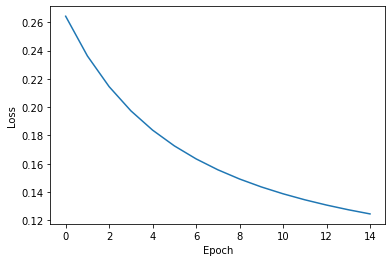

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [18]:
print(w)
print(b)

[0.71409206]
-0.10985288006827136


In [19]:
# find P
def find_p(X_point, w,b):
  f_test = decision_function([X_point],coefs,svcs,intercept,0.001)
  return 1 / (1+np.exp(-(w*f_test+b)))[0][0]

In [20]:
p_vals = [find_p(x,w,b) for x in X_test]
p_vals

[0.795783819146929,
 0.03935535371737212,
 0.11223979312108773,
 0.13211597474268041,
 0.762037840512687,
 0.045628986982347734,
 0.08203450071364381,
 0.10721001124259123,
 0.14750139467834777,
 0.44766508734750793,
 0.12349451817102308,
 0.5841844212624675,
 0.1524829476485025,
 0.6737699081052851,
 0.0906870868420059,
 0.2654310532328188,
 0.7191684001308745,
 0.12881817877484647,
 0.749220490714279,
 0.32943904213069325,
 0.021101512857306104,
 0.1134337287738212,
 0.28810047673044936,
 0.07923321327093828,
 0.05964402376197869,
 0.20127877569376754,
 0.1865294150541119,
 0.33628128706223054,
 0.08134041097960847,
 0.14919270908454113,
 0.7731208077535354,
 0.6384993790524338,
 0.10041366766794253,
 0.6994579909433971,
 0.19051067181755743,
 0.5751626729414853,
 0.29926646174759286,
 0.11396245242031672,
 0.19686611911012472,
 0.12711915043174374,
 0.6115447728652709,
 0.041801821904530134,
 0.7602242867999255,
 0.07256070732202438,
 0.1876701781722857,
 0.13981156300059708,
 0.535